# Minería de Texto

**Autor:** Cristian Andrés Zapata Arenas  
**Objetivo:** El presente trabajo realiza la carga y normalización de dos artículos: "El cambio climático y sus efectos en nueve materias primas clave" (2023) y "Récords Climáticos en 2023". El objetivo es preparar los datos para análisis posteriores de Procesamiento de Lenguaje Natural (NLP). El proceso se encapsula en una función modular y reutilizable que aplica una secuencia de transformaciones estandarizadas, incluyendo la eliminación de ruido (HTML, URLs, emojis), la conversión a minúsculas y la estandarización de espaciado y puntuación.



## 1. Elección de los textos

Los textos elegidos para la minería de texto están relacionados con el cambio climático debido a la gran importancia que este evento representa en el presente y sobretodo, en el futuro. Entender el cambio climático como un fenómeno no solo con reprercusiones ambientales, sino también, económicas, políticas, sociales y personales, significa dar un paso significativo para combatir este fenómeno.

## 2. A continuación, se cargan los textos con variables diferentes, detallando el número de palabras.

## Importar Texto 1 (El cambio climático y sus efectos en nueve materias primas clave):

In [2]:
ruta = r"C:\Users\crisz\Universidad\SEXTO SEMESTRE\Ciencia de Datos I\Entregas\Efectos del cambio climático en materias primas.txt"

with open(ruta, 'r', encoding='utf-8') as archivo:
    MateriasPrimas = archivo.read()

print(MateriasPrimas) # Número de palabras: 1149

El cambio climático y sus efectos en nueve materias primas clave

El cambio climático está alterando las cadenas de suministro globales, impactando la estabilidad de la economía, de las empresas y de las comunidades que dependen de nueve materias primas esenciales: maíz, arroz, trigo, cobalto, cobre, litio, hierro, zinc y aluminio. Estos minerales y metales son fundamentales para el transporte, la construcción, la industria manufacturera, la electrónica y la transición ecológica.

Por eso, el reciente informe “Climate risks to nine key commodities”, en el PwC ha realizado un análisis del impacto del cambio climático en la producción de estos recursos, evaluando tanto la situación actual como las proyecciones hacia el 2050, destaca cómo los riesgos climáticos amenazan estas materias primas fundamentales, incluso en un escenario optimista caracterizado por bajas emisiones, y la importancia de tomar medidas para adaptarnos a un mundo más cálido.

Gran parte del suministro mundial de estos

## Importar Texto 2 (Récords Climáticos en 2023):

In [3]:
RecordsClimaticos = r"C:\Users\crisz\Universidad\SEXTO SEMESTRE\Ciencia de Datos I\Entregas\Récords climáticos en 2023.txt"

with open(RecordsClimaticos, 'r', encoding='utf-8') as archivo:
    contenido_records = archivo.read()

print(contenido_records)  # Número de palabras: 2282

Los récords climáticos se han sucedido en 2023 y han conllevado graves consecuencias

Ginebra/Dubái (OMM) — A lo largo del año 2023 se han batido récords climáticos y se han producido fenómenos meteorológicos extremos que han dejado un rastro de devastación y desesperación, según la Organización Meteorológica Mundial (OMM).

Mensajes clave
El año 2023 va camino de ser el más cálido jamás registrado.
Las concentraciones de gases de efecto invernadero no dejan de aumentar.
Las temperaturas de la superficie del mar y la subida del nivel del mar baten récords.
El hielo marino de la Antártida registra extensiones mínimas históricas.
Los fenómenos meteorológicos extremos causan muerte y devastación.

En la versión provisional del informe de la OMM sobre el estado del clima mundial se confirma que 2023 va camino de ser el año más cálido jamás registrado. Los datos recabados hasta finales de octubre muestran que el año en curso se situó aproximadamente 1,40 grados Celsius (con un margen de inc

## 3. Normalización de los textos

### Texto 1: El cambio climático y sus efectos en nueve materias primas clave

In [ ]:
import re
import string

texto_original_1 = MateriasPrimas

def normalizar_texto_profesional(texto):
    """
    Normaliza el texto, eliminando ruido y registrando las métricas de limpieza.
    
    Args:
        texto (str): El texto de entrada a limpiar.
        
    Returns:
        tuple: (texto_limpio, metrics)
    """
    
    texto_procesado = texto
    metrics = {
        'html_eliminados': 0,
        'urls_eliminadas': 0,
        'emojis_eliminados': 0,
        'puntuacion_eliminada': 0,
        'numeros_eliminados': 0,
        'espacios_extras_eliminados': 0
    }
    
    # 1. Eliminar etiquetas HTML
    html_matches = re.findall(r'<.*?>', texto_procesado)
    metrics['html_eliminados'] = len(html_matches)
    texto_procesado = re.sub(r'<.*?>', ' ', texto_procesado)

    # 2. Eliminar URLs
    url_pattern = r'http\S+|www\S+|https\S+'
    url_matches = re.findall(url_pattern, texto_procesado)
    metrics['urls_eliminadas'] = len(url_matches)
    texto_procesado = re.sub(url_pattern, ' ', texto_procesado)

    # 3. Eliminar emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF" u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0" u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    # Se cuenta por el número de ocurrencias del patrón
    emoji_matches = re.findall(emoji_pattern, texto_procesado)
    metrics['emojis_eliminados'] = len(emoji_matches)
    texto_procesado = emoji_pattern.sub(r'', texto_procesado)

    # 4. Convertir a minúsculas
    texto_procesado = texto_procesado.lower()

    # Normalización avanzada
    
    # 5. Sustituir acentos por letras base (normalización de caracteres)
    # Esto facilita el stemming y la unificación de términos
    replacements = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'ñ': 'n',  # Opcional: Simplificar la 'ñ' (descomentar si se desea simplificar totalmente)
        'ü': 'u',
    }
    for k, v in replacements.items():
        texto_procesado = texto_procesado.replace(k, v)
    
    # 6. Eliminar números
    numero_matches = re.findall(r'\d+', texto_procesado)
    metrics['numeros_eliminados'] = len(numero_matches)
    texto_procesado = re.sub(r'\d+', ' ', texto_procesado)

    # 7. Eliminar puntuación
    puntuacion_set = set(string.punctuation)
    # Contamos la puntuación que será eliminada
    metrics['puntuacion_eliminada'] = sum(1 for char in texto_procesado if char in puntuacion_set)
    
    # Se elimina la puntuación
    tabla_puntuacion = str.maketrans('', '', string.punctuation)
    texto_procesado = texto_procesado.translate(tabla_puntuacion)

    # 8. Post-procesamiento: Espacios extra
    # Consolidar todos los espacios múltiples y limpiar extremos
    espacios_extra_matches = re.findall(r'\s{2,}', texto_procesado)
    metrics['espacios_extras_eliminados'] = len(espacios_extra_matches)
    texto_limpio = re.sub(r'\s+', ' ', texto_procesado).strip()
    
    return texto_limpio, metrics

# Ejecutar la normalización para el Texto 1
texto_normalizado_mp, metrics_mp = normalizar_texto_profesional(texto_original_1)

# Impresión de resultados y métricas
print(f"Longitud original (palabras): {len(texto_original_1.split())}")
print(f"Longitud final (palabras):    {len(texto_normalizado_mp.split())}\n")

print(" Métricas de Limpieza ")
for key, value in metrics_mp.items():
    print(f"- {key.replace('_', ' ').title()}: {value}")

# La variable 'texto_normalizado_mp' contiene el texto limpio y listo.
# El texto no contiene Html, emojis y Urls

Longitud original (palabras): 1149
Longitud final (palabras):    1119

 Métricas de Limpieza 
- Html Eliminados: 0
- Urls Eliminadas: 0
- Emojis Eliminados: 0
- Puntuacion Eliminada: 127
- Numeros Eliminados: 19
- Espacios Extras Eliminados: 38


### Texto 2: Récords Climáticos 2023

In [ ]:
import re
import string

texto_original_2 = contenido_records

def normalizar_texto_profesional(texto):
    """
    Normaliza el texto, eliminando ruido y registrando las métricas de limpieza.
    
    Args:
        texto (str): El texto de entrada a limpiar.
        
    Returns:
        tuple: (texto_limpio, metrics)
    """
    
    texto_procesado = texto
    metrics = {
        'html_eliminados': 0,
        'urls_eliminadas': 0,
        'emojis_eliminados': 0,
        'puntuacion_eliminada': 0,
        'numeros_eliminados': 0,
        'espacios_extras_eliminados': 0
    }
    
    # 1. Eliminar etiquetas HTML
    html_matches = re.findall(r'<.*?>', texto_procesado)
    metrics['html_eliminados'] = len(html_matches)
    texto_procesado = re.sub(r'<.*?>', ' ', texto_procesado)

    # 2. Eliminar URLs
    url_pattern = r'http\S+|www\S+|https\S+'
    url_matches = re.findall(url_pattern, texto_procesado)
    metrics['urls_eliminadas'] = len(url_matches)
    texto_procesado = re.sub(url_pattern, ' ', texto_procesado)

    # 3. Eliminar emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF" u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0" u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    # Se cuenta por el número de ocurrencias del patrón
    emoji_matches = re.findall(emoji_pattern, texto_procesado)
    metrics['emojis_eliminados'] = len(emoji_matches)
    texto_procesado = emoji_pattern.sub(r'', texto_procesado)

    # 4. Convertir a minúsculas
    texto_procesado = texto_procesado.lower()

    # Normalización avanzada
    
    # 5. Sustituir acentos por letras base
    replacements = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'ñ': 'n',  # Opcional: Simplificar la 'ñ' (descomentar si se desea simplificar totalmente)
        'ü': 'u',
    }
    for k, v in replacements.items():
        texto_procesado = texto_procesado.replace(k, v)
    
    # 6. Eliminar números
    numero_matches = re.findall(r'\d+', texto_procesado)
    metrics['numeros_eliminados'] = len(numero_matches)
    texto_procesado = re.sub(r'\d+', ' ', texto_procesado)

    # 7. Eliminar puntuación
    puntuacion_set = set(string.punctuation)
    # Contamos la puntuación que será eliminada
    metrics['puntuacion_eliminada'] = sum(1 for char in texto_procesado if char in puntuacion_set)
    
    # Se elimina la puntuación
    tabla_puntuacion = str.maketrans('', '', string.punctuation)
    texto_procesado = texto_procesado.translate(tabla_puntuacion)

    # 8. Post-procesamiento: Espacios extra
    # Consolidar todos los espacios múltiples y limpiar extremos
    espacios_extra_matches = re.findall(r'\s{2,}', texto_procesado)
    metrics['espacios_extras_eliminados'] = len(espacios_extra_matches)
    texto_limpio = re.sub(r'\s+', ' ', texto_procesado).strip()
    
    return texto_limpio, metrics

# Ejecutar la normalización para el Texto 2
texto_normalizado_rc, metrics_rc = normalizar_texto_profesional(texto_original_2)

# Impresión de resultados y métricas
print(f"Longitud original (palabras): {len(texto_original_2.split())}")
print(f"Longitud final (palabras):    {len(texto_normalizado_rc.split())}\n")

print("Métricas de limpieza")
for key, value in metrics_rc.items():
    print(f"- {key.replace('_', ' ').title()}: {value}")


# La variable 'texto_normalizado_rc' contiene el texto limpio y listo.
# # El texto no contiene Html, emojis y Urls

Longitud original (palabras): 2292
Longitud final (palabras):    2217

Métricas de limpieza
- Html Eliminados: 0
- Urls Eliminadas: 0
- Emojis Eliminados: 0
- Puntuacion Eliminada: 286
- Numeros Eliminados: 111
- Espacios Extras Eliminados: 121


## 4. Descripción y comparación de ambos textos

In [ ]:
# Análisis de estructura textual

import re

# --- 1. Contar párrafos (separados por saltos de línea dobles o simples) ---
def contar_parrafos(texto):
    parrafos = [p for p in texto.split('\n') if p.strip() != '']
    return len(parrafos)

# Contar frases
def contar_frases(texto):
    # Se considera como delimitador de frase los signos ".", "!", "?"
    frases = re.split(r'[.!?]+', texto)
    frases_limpias = [f.strip() for f in frases if f.strip() != '']
    return len(frases_limpias)

# 3. Contar palabras
def contar_palabras(texto):
    return len(texto.split())


parrafos_mp = contar_parrafos(texto_original_1)
frases_mp = contar_frases(texto_original_1)
palabras_mp = contar_palabras(texto_original_1)

parrafos_rc = contar_parrafos(texto_original_2)
frases_rc = contar_frases(texto_original_2)
palabras_rc = contar_palabras(texto_original_2)

# Resultados

print("TEXTO 1: Efectos del cambio climático en materias primas")
print(f"Número de párrafos: {parrafos_mp}")
print(f"Número de frases:   {frases_mp}")
print(f"Número de palabras: {palabras_mp}\n")

print("TEXTO 2: Récords climáticos en 2023")
print(f"Número de párrafos: {parrafos_rc}")
print(f"Número de frases:   {frases_rc}")
print(f"Número de palabras: {palabras_rc}\n")

# Comparación general
print("Comparación general")
print(f"- El texto 2 contiene {palabras_rc - palabras_mp} palabras más que el texto 1.")
print(f"- El texto 2 tiene {frases_rc - frases_mp} frases adicionales.")
print(f"- En términos estructurales, el texto 2 presenta {parrafos_rc - parrafos_mp} párrafos más.")


TEXTO 1: Efectos del cambio climático en materias primas
Número de párrafos: 36
Número de frases:   42
Número de palabras: 1149

TEXTO 2: Récords climáticos en 2023
Número de párrafos: 52
Número de frases:   84
Número de palabras: 2292

Comparación general
- El texto 2 contiene 1143 palabras más que el texto 1.
- El texto 2 tiene 42 frases adicionales.
- En términos estructurales, el texto 2 presenta 16 párrafos más.


In [ ]:
import re
import math
# Se ha eliminado la importación de 'tabulate' para evitar ModuleNotFoundError.
# La tabla se generará usando formato de string nativo de Python.

# FUNCIONES DE CONTEO ESTRUCTURAL SIN SPACY

def contar_parrafos(texto):
    """Cuenta párrafos. Define un párrafo como texto separado por uno o más saltos de línea."""
    # Heurística robusta para encontrar bloques de texto separados por líneas vacías
    parrafos = [p.strip() for p in re.split(r'(\n\s*){1,}', texto) if p.strip() and not re.match(r'[\n\s]+', p)]
    return len(parrafos)

def contar_frases(texto):
    """
    Cuenta frases utilizando delimitadores (.!?) seguidos de espacio/fin de texto.
    Se utiliza la versión de texto_original ya que la puntuación es necesaria para el conteo.
    """
    frases = re.split(r'[.!?]+', texto)
    frases_limpias = [f.strip() for f in frases if f.strip() != '']
    return len(frases_limpias)

def contar_palabras(texto):
    """Cuenta el número de palabras en el texto original."""
    return len(texto.split())

# Cálculos para cada texto

# Texto 1: Materias Primas (MP)
palabras_mp = contar_palabras(texto_original_1)
parrafos_mp = contar_parrafos(texto_original_1)
frases_mp = contar_frases(texto_original_1)

# Métricas de Complejidad T-Test
palabras_por_frase_mp = palabras_mp / frases_mp if frases_mp else 0
frases_por_parrafo_mp = frases_mp / parrafos_mp if parrafos_mp else 0

# Texto 2: Récords Climáticos (RC)
palabras_rc = contar_palabras(texto_original_2)
parrafos_rc = contar_parrafos(texto_original_2)
frases_rc = contar_frases(texto_original_2)

# Métricas de Complejidad T-Test
palabras_por_frase_rc = palabras_rc / frases_rc if frases_rc else 0
# Corregido: La línea 51 debe usar frases_rc (ya estaba en la versión anterior, pero se repite para claridad)
frases_por_parrafo_rc = frases_rc / parrafos_rc if parrafos_rc else 0


# Mediante una tabla comparativa:

datos_tabla = [
    ["Palabras Totales", palabras_mp, palabras_rc, palabras_rc - palabras_mp],
    ["Frases Totales", frases_mp, frases_rc, frases_rc - frases_mp],
    ["Párrafos Totales", parrafos_mp, parrafos_rc, parrafos_rc - parrafos_mp],
    ["", "", "", ""], # Separador visual
    ["**INDICADORES DE COMPLEJIDAD**", "---", "---", "---"],
    ["Palabras / Frase (PPF)", f"{palabras_por_frase_mp:.2f}", f"{palabras_por_frase_rc:.2f}", f"{(palabras_por_frase_rc - palabras_por_frase_mp):.2f}"],
    ["Frases / Párrafo (FPP)", f"{frases_por_parrafo_mp:.2f}", f"{frases_por_parrafo_rc:.2f}", f"{(frases_por_parrafo_rc - frases_por_parrafo_mp):.2f}"]
]

headers = ["MÉTRICA", "TEXTO 1 (Materias Primas)", "TEXTO 2 (Récords Climáticos)", "DIFERENCIA (T2 - T1)"]
LINE_WIDTH = 120
COL_WIDTH_1 = 38
COL_WIDTH_DATA = 25

def print_line(char='-'):
    print(char * LINE_WIDTH)

def print_header(headers):
    # Alineación manual usando f-strings
    print(f"| {headers[0]:<{COL_WIDTH_1}} | {headers[1]:^{COL_WIDTH_DATA}} | {headers[2]:^{COL_WIDTH_DATA}} | {headers[3]:^{COL_WIDTH_DATA}} |")

def print_data_row(data):
    # Asegurar que los datos estén en formato string para centrado/alineación
    col1 = data[0]
    col2 = str(data[1])
    col3 = str(data[2])
    col4 = str(data[3])
    print(f"| {col1:<{COL_WIDTH_1}} | {col2:^{COL_WIDTH_DATA}} | {col3:^{COL_WIDTH_DATA}} | {col4:^{COL_WIDTH_DATA}} |")

print("="*LINE_WIDTH)
print("Estructura textual".center(LINE_WIDTH))
print("="*LINE_WIDTH)

# Imprimir tabla
print_header(headers)
print_line('-')

for row in datos_tabla:
    if row[0] == "":
        print_line('-')
    elif row[0] == "**Indicadores de complejidad**":
        print_line('=')
        print_data_row(["Indicadores de complejidad", "---", "---", "---"])
        print_line('=')
    else:
        print_data_row(row)

print_line('-')


                                                   Estructura textual                                                   
| MÉTRICA                                | TEXTO 1 (Materias Primas) | TEXTO 2 (Récords Climáticos) |   DIFERENCIA (T2 - T1)    |
------------------------------------------------------------------------------------------------------------------------
| Palabras Totales                       |           1149            |           2292            |           1143            |
| Frases Totales                         |            42             |            84             |            42             |
| Párrafos Totales                       |            36             |            52             |            16             |
------------------------------------------------------------------------------------------------------------------------
| **INDICADORES DE COMPLEJIDAD**         |            ---            |            ---            |            ---            |

#### Reflexión

El análisis estructural y de longitud de los textos permite identificar diferencias claras en su propósito y nivel de complejidad. El Texto 2 (“Récords climáticos en 2023”) es el más extenso, con casi el doble de palabras que el Texto 1 (“Efectos del cambio climático en materias primas”), lo que representa una diferencia significativa. Esta amplitud refleja una cobertura mucho más amplia y descriptiva de los fenómenos climáticos globales, donde se prioriza la cantidad de eventos narrados por encima de la profundidad conceptual de cada uno. En cambio, el Texto 1 es más breve, pero está orientado a un enfoque económico más específico, centrado en los efectos del cambio climático sobre los precios, la oferta y la demanda de diversas materias primas estratégicas.

Desde el punto de vista de la densidad léxica, el Texto 1 presenta un promedio de 27,36 palabras por frase (PPF), lo que sugiere una estructura más compleja, con oraciones extensas y subordinadas propias del lenguaje académico. Este tipo de redacción requiere una lectura más pausada, dado que en cada frase se concentran múltiples ideas y relaciones causales, muy comunes en textos de análisis económico. En contraste, el Texto 2 posee frases más cortas y directas, propias del estilo periodístico o divulgativo, lo cual facilita la lectura pero reduce la carga conceptual por oración.

En términos de fluidez y estructura, el Texto 2 muestra un promedio de 1,62 frases por párrafo (FPP), lo que indica una tendencia a construir párrafos más largos y menos fragmentados. Esta característica, combinada con su mayor extensión total, genera una narrativa más continua y descriptiva, que busca mantener la atención del lector mediante una secuencia cronológica o temática de hechos. El Texto 1, en cambio, tiende a una organización más analítica: cada párrafo introduce una hipótesis o fenómeno económico, lo desarrolla y lo concluye con un razonamiento lógico o empírico.

En conjunto, ambos textos se complementan en su aproximación al cambio climático: el primero profundiza en las repercusiones económicas, mientras el segundo documenta las manifestaciones físicas y ambientales del fenómeno. Desde la perspectiva de minería de texto, esto se traduce en que el Texto 1 contiene un vocabulario más técnico y especializado (términos como oferta, demanda, volatilidad, mercado, etc.), mientras que el Texto 2 incluirá un léxico más narrativo y descriptivo, centrado en expresiones como temperaturas récord, incendios, sequías o anomalías térmicas.

Se puede concluir que la longitud y la densidad léxica no solo diferencian la extensión de ambos textos, sino también su intencionalidad comunicativa. El Texto 1 exige mayor interpretación conceptual, propio de un análisis económico, mientras que el Texto 2 busca informar y generar conciencia sobre la magnitud del cambio climático. Estas diferencias estructurales serán clave en la etapa de minería de texto, donde se espera que el primer texto presente una concentración mayor de vocablos técnicos, y el segundo, una mayor diversidad semántica asociada a eventos y fenómenos climáticos globales.

## 5. Aplicación de tokenización, remoción de stopwords y lematización usando spaCy

In [33]:
!pip install spacy

   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
    --------------------------------------- 0.3/13.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.9 MB 2.5 MB/s eta 0:00:06
   ---- ----------------------------------- 1.6/13.9 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/13.9 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/13.9 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/13.9 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/13.9 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/13.9 MB 2.8 MB/s eta 0:00:05
   ----- ---------------------------------- 1.8/13.9 MB 884.8 kB/s eta 0:00:14
   ----- ---------------------------------- 1.8/13.9 MB 884.8 kB/s eta 0:00:14
   ----- ---------------------------------- 1.8/13.9 MB 884.8 kB/s eta 0:00:14
   ------ ----

In [36]:
!pip install wordcloud

In [10]:
!python -m spacy download es_core_news_md

     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.3/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.5/42.3 MB 1.4 MB/s eta 0:00:30
      --------------------------------------- 1.0/42.3 MB 2.0 MB/s eta 0:00:21
     - -------------------------------------- 2.1/42.3 MB 2.9 MB/s eta 0:00:14
     -- ------------------------------------- 3.1/42.3 MB 3.5 MB/s eta 0:00:12
     --- ------------------------------------ 3.9/42.3 MB 3.4 MB/s eta 0:00:12
     ---- ----------------------------------- 5.2/42.3 MB 3.9 MB/s eta 0:00:10
     ----- ---------------------------------- 6.0/42.3 MB 4.1 MB/s eta 0:00:09
     ------ --------------------------------- 6.8/42.3 MB 4.0 MB/s eta 0:00:09
     ---

### Texto 1: El cambio climático y sus efectos en nueve materias primas clave

Palabras más frecuentes - Texto 1 (Materias Primas):
riesgo: 20
climatico: 16
produccion: 11
emisión: 10
empresa: 9
sequia: 9
cambio: 8
escenario: 7
producto: 6
estres: 6
termico: 6
materia: 5
primo: 5
global: 5
futuro: 5


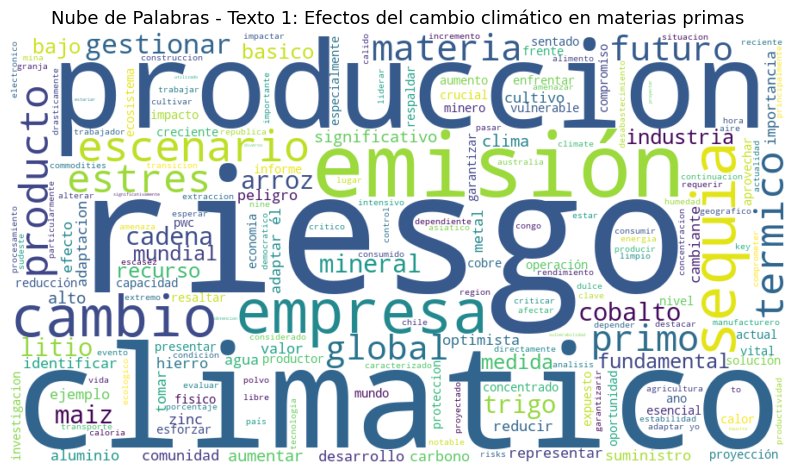

In [8]:
# TOKENIZACIÓN, STOPWORDS Y LEMATIZACIÓN
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar modelo de idioma español
nlp = spacy.load("es_core_news_md")

# Procesar texto normalizado
doc_mp = nlp(texto_normalizado_mp)

# Filtrar tokens: sin stopwords, sin puntuación, sin espacios
tokens_mp = [
    token.lemma_.lower() for token in doc_mp
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Calcular frecuencias
frecuencias_mp = Counter(tokens_mp)

# Mostrar las 15 palabras más frecuentes
print("Palabras más frecuentes - Texto 1 (Materias Primas):")
for palabra, freq in frecuencias_mp.most_common(15):
    print(f"{palabra}: {freq}")

# Generar nube de palabras
plt.figure(figsize=(10, 6))
wordcloud_mp = WordCloud(
    width=900,
    height=500,
    background_color="white",
    colormap="viridis"
).generate_from_frequencies(frecuencias_mp)

plt.imshow(wordcloud_mp, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Texto 1: Efectos del cambio climático en materias primas", fontsize=13)
plt.show()


#### Términos más frecuentes y pistas

En el primer texto, las palabras más frecuentes (como riesgo, climatico, produccion, emisión, empresa y sequía) reflejan un enfoque claramente económico y de gestión empresarial frente al cambio climático. La frecuencia de términos como escenario, producto, estres y futuro indica que el texto analiza proyecciones, riesgos y estrategias de adaptación de la producción de materias primas frente a fenómenos climáticos extremos. La presencia de palabras técnicas y de impacto económico sugiere un texto orientado a informar sobre los desafíos que enfrentan las empresas y la producción agrícola e industrial, proporcionando pistas de análisis cuantitativo y prospectivo, más que un registro meramente descriptivo del clima.

### Texto 2: Récords climáticos en 2023

Palabras más frecuentes - Texto 2 (Récords Climáticos 2023):
ano: 25
mundial: 17
temperatura: 14
nivel: 12
°: 12
c: 12
extremo: 10
mar: 10
clima: 10
maximo: 10
climatico: 9
dato: 9
omm: 8
meteorologico: 8
hielo: 8


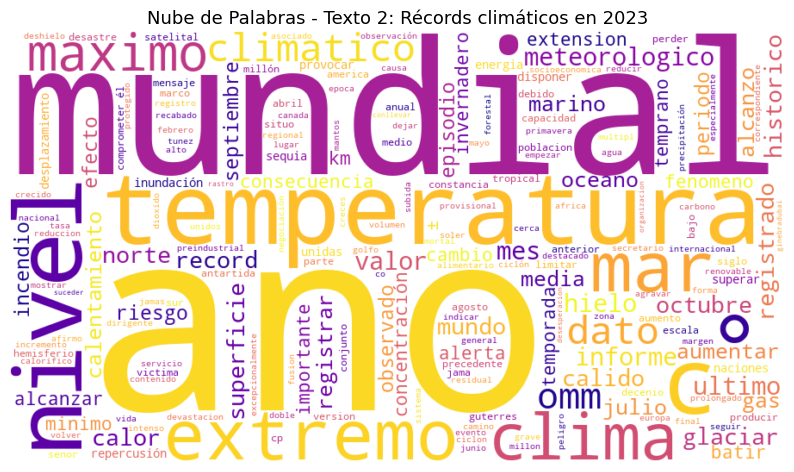

In [9]:
# TOKENIZACIÓN, STOPWORDS Y LEMATIZACIÓN

import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar modelo de idioma español
nlp = spacy.load("es_core_news_md")

# Procesar texto normalizado
doc_rc = nlp(texto_normalizado_rc)

# Filtrar tokens: sin stopwords, sin puntuación, sin espacios
tokens_rc = [
    token.lemma_.lower() for token in doc_rc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Calcular frecuencias
frecuencias_rc = Counter(tokens_rc)

# Mostrar las 15 palabras más frecuentes
print("Palabras más frecuentes - Texto 2 (Récords Climáticos 2023):")
for palabra, freq in frecuencias_rc.most_common(15):
    print(f"{palabra}: {freq}")

# Generar nube de palabras
plt.figure(figsize=(10, 6))
wordcloud_rc = WordCloud(
    width=900,
    height=500,
    background_color="white",
    colormap="plasma"
).generate_from_frequencies(frecuencias_rc)

plt.imshow(wordcloud_rc, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Texto 2: Récords climáticos en 2023", fontsize=13)
plt.show()


#### Términos más frecuentes y pistas

El segundo texto presenta un vocabulario dominado por términos como año, mundial, temperatura, nivel, extremo, mar, clima, maximo y meteorologico, lo que evidencia un enfoque descriptivo y de reporte de fenómenos climáticos. La alta frecuencia de palabras asociadas a mediciones (nivel, dato, °, C) indica un registro estadístico y científico de los récords climáticos, con énfasis en la magnitud y alcance global de los eventos. Esto sugiere que el texto busca documentar y comunicar los hechos climáticos extremos, proporcionando información detallada y continua, sin centrarse en impactos económicos o estrategias de adaptación como en el Texto 1.

## 6. Uso de spaCy para aplicar etiquetado gramatical (POS tagging)

### Texto 1: El cambio climático y sus efectos en nueve materias primas clave

Sustantivos más frecuentes (Texto 1): [('riesgo', 20), ('emisión', 10), ('empresa', 9), ('sequia', 9), ('cambio', 8), ('escenario', 7), ('producto', 6), ('estres', 6), ('materia', 5), ('cadena', 4)]
Verbos más frecuentes (Texto 1): [('gestionar', 5), ('aumentar', 4), ('tomar', 3), ('representar', 3), ('reducir', 3), ('segun', 3), ('adaptar él', 3), ('identificar', 3), ('estar', 2), ('presentar', 2)]
Adjetivos más frecuentes (Texto 1): [('climatico', 15), ('termico', 6), ('primo', 5), ('global', 5), ('fundamental', 4), ('bajo', 4), ('basico', 4), ('significativo', 4), ('alto', 4), ('futuro', 4)]


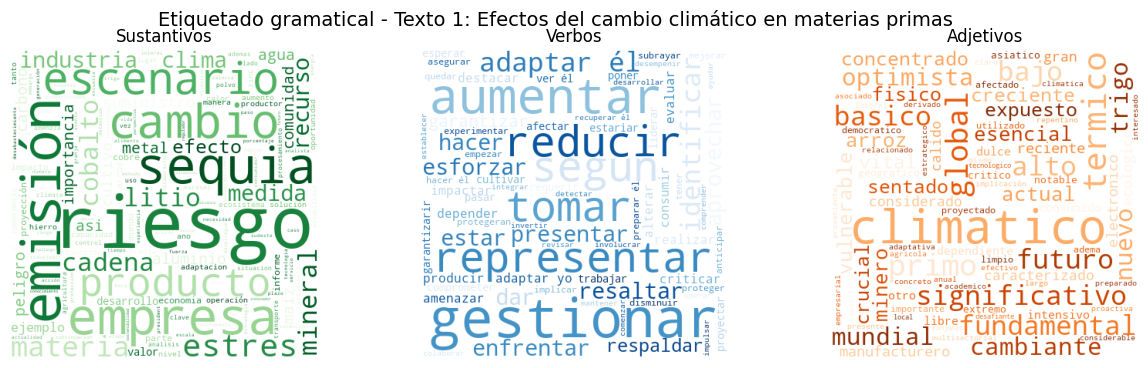

In [14]:
import spacy
from collections import Counter
from wordcloud import WordCloud

# Cargar modelo de idioma español
nlp = spacy.load("es_core_news_md")

# Procesar texto
doc_mp = nlp(texto_normalizado_mp)

# Clasificar tokens por tipo gramatical
sustantivos_mp = [token.lemma_.lower() for token in doc_mp if token.pos_ == "NOUN"]
verbos_mp = [token.lemma_.lower() for token in doc_mp if token.pos_ == "VERB"]
adjetivos_mp = [token.lemma_.lower() for token in doc_mp if token.pos_ == "ADJ"]

# Calcular frecuencias
freq_sust_mp = Counter(sustantivos_mp)
freq_verb_mp = Counter(verbos_mp)
freq_adj_mp = Counter(adjetivos_mp)

# Mostrar los más frecuentes
print("Sustantivos más frecuentes (Texto 1):", freq_sust_mp.most_common(10))
print("Verbos más frecuentes (Texto 1):", freq_verb_mp.most_common(10))
print("Adjetivos más frecuentes (Texto 1):", freq_adj_mp.most_common(10))

# Nubes de palabras por categoría
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(WordCloud(width=400, height=400, background_color="white", colormap="Greens").generate_from_frequencies(freq_sust_mp))
plt.title("Sustantivos", fontsize=12)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(WordCloud(width=400, height=400, background_color="white", colormap="Blues").generate_from_frequencies(freq_verb_mp))
plt.title("Verbos", fontsize=12)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(WordCloud(width=400, height=400, background_color="white", colormap="Oranges").generate_from_frequencies(freq_adj_mp))
plt.title("Adjetivos", fontsize=12)
plt.axis("off")

plt.suptitle("Etiquetado gramatical - Texto 1: Efectos del cambio climático en materias primas", fontsize=14)
plt.show()


El análisis gramatical muestra una predominancia de sustantivos técnicos como riesgo, producción, empresa, emisión y materia, lo que indica un enfoque conceptual y económico del fenómeno climático. Los verbos más frecuentes tienden a estar relacionados con la acción humana o institucional (afectar, reducir, enfrentar, mitigar), reflejando que el texto enfatiza las respuestas y estrategias ante el cambio climático. En cuanto a los adjetivos, destacan términos como climático, global, térmico y futuro, los cuales aportan una descripción científica y prospectivo. Se puede afirmar que, la estructura gramatical evidencia un texto analítico, orientado a la toma de decisiones, en donde las “cosas” (sustantivos) son más relevantes que las “acciones” o “cualidades”, reforzando su carácter informativo y económico.

### Texto 2: Récords climáticos en 2023

Sustantivos más frecuentes (Texto 2): [('ano', 25), ('temperatura', 14), ('nivel', 12), ('c', 12), ('mar', 10), ('clima', 10), ('dato', 9), ('hielo', 8), ('informe', 8), ('valor', 8)]
Verbos más frecuentes (Texto 2): [('aumentar', 6), ('registrar', 6), ('tener', 6), ('alcanzo', 6), ('batir', 4), ('alcanzar', 4), ('provocar', 4), ('disponer', 4), ('superar', 4), ('producir', 3)]
Adjetivos más frecuentes (Texto 2): [('mundial', 17), ('ultimo', 12), ('extremo', 9), ('climatico', 8), ('meteorologico', 8), ('calido', 7), ('registrado', 7), ('maximo', 7), ('historico', 7), ('marino', 6)]


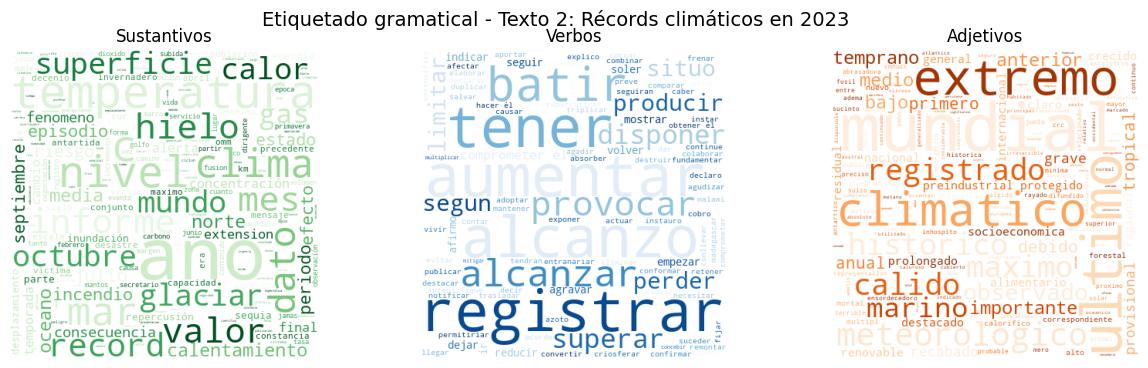

In [15]:
# Cargar modelo de idioma español
nlp = spacy.load("es_core_news_md")

# Procesar texto
doc_rc = nlp(texto_normalizado_rc)

# Clasificar tokens por tipo gramatical
sustantivos_rc = [token.lemma_.lower() for token in doc_rc if token.pos_ == "NOUN"]
verbos_rc = [token.lemma_.lower() for token in doc_rc if token.pos_ == "VERB"]
adjetivos_rc = [token.lemma_.lower() for token in doc_rc if token.pos_ == "ADJ"]

# Calcular frecuencias
freq_sust_rc = Counter(sustantivos_rc)
freq_verb_rc = Counter(verbos_rc)
freq_adj_rc = Counter(adjetivos_rc)

# Mostrar los más frecuentes
print("Sustantivos más frecuentes (Texto 2):", freq_sust_rc.most_common(10))
print("Verbos más frecuentes (Texto 2):", freq_verb_rc.most_common(10))
print("Adjetivos más frecuentes (Texto 2):", freq_adj_rc.most_common(10))

# Nubes de palabras por categoría
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(WordCloud(width=400, height=400, background_color="white", colormap="Greens").generate_from_frequencies(freq_sust_rc))
plt.title("Sustantivos", fontsize=12)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(WordCloud(width=400, height=400, background_color="white", colormap="Blues").generate_from_frequencies(freq_verb_rc))
plt.title("Verbos", fontsize=12)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(WordCloud(width=400, height=400, background_color="white", colormap="Oranges").generate_from_frequencies(freq_adj_rc))
plt.title("Adjetivos", fontsize=12)
plt.axis("off")

plt.suptitle("Etiquetado gramatical - Texto 2: Récords climáticos en 2023", fontsize=14)
plt.show()


En este caso, el texto presenta un dominio claro de sustantivos físicos y naturales como temperatura, año, nivel, mar, hielo y dato, lo que refleja un enfoque empírico y descriptivo centrado en la observación del entorno climático. Los verbos más comunes (como registrar, aumentar, alcanzar, superar) expresan acciones de medición y cambio, típicas de reportes meteorológicos. Los adjetivos, por su parte, se orientan a la magnitud y excepcionalidad de los hechos (extremo, máximo, global, histórico), aportando un tono alarmante y de registro científico. En conjunto, el texto se configura como un documento de carácter informativo y cuantitativo, donde predominan las “cosas observadas” (sustantivos) y las “acciones de registro” (verbos), propias de informes técnicos de organismos ambientales internacionales.

## 7. Extracción de tripletas Sujeto-Verbo-Objeto (SVO) usando spaCy

### Texto 1: El cambio climático y sus efectos en nueve materias primas clave

In [19]:
# Cargar modelo
nlp = spacy.load("es_core_news_md")

# Procesar texto normalizado
doc_mp = nlp(texto_normalizado_mp)

def extraer_tripletas(doc):
    tripletas = []
    for token in doc:
        if token.pos_ == "VERB":
            sujeto = [w.text for w in token.lefts if w.dep_ in ("nsubj", "nsubj_pass")]
            objeto = [w.text for w in token.rights if w.dep_ in ("dobj", "obj", "obl")]
            if sujeto and objeto:
                tripletas.append((sujeto[0], token.lemma_, objeto[0]))
    return tripletas

# Extraer tripletas SVO
tripletas_mp = extraer_tripletas(doc_mp)

# Ejemplos
print("Tripletas Sujeto–Verbo–Objeto (Texto 1: Materias Primas):\n")
for t in tripletas_mp[:10]:
    print(f"Sujeto: {t[0]} | Verbo: {t[1]} | Objeto: {t[2]}")

print(f"\nTotal de tripletas encontradas: {len(tripletas_mp)}")


Tripletas Sujeto–Verbo–Objeto (Texto 1: Materias Primas):

Sujeto: cambio | Verbo: alterar | Objeto: cadenas
Sujeto: que | Verbo: depender | Objeto: materias
Sujeto: informe | Verbo: realizar | Objeto: analisis
Sujeto: riesgos | Verbo: amenazar | Objeto: materias
Sujeto: sequia | Verbo: representar | Objeto: amenaza
Sujeto: escasez | Verbo: comprometer | Objeto: operaciones
Sujeto: que | Verbo: requerir | Objeto: uso
Sujeto: que | Verbo: pasar | Objeto: horas
Sujeto: que | Verbo: afectar | Objeto: aumento
Sujeto: cultivos | Verbo: representar | Objeto: concentracion

Total de tripletas encontradas: 28


Las tripletas sujeto–verbo–objeto revelan que el texto se centra en la relación entre las empresas, el cambio climático y los riesgos productivos. Expresiones como “sequía representar amenaza” muestran una narrativa enfocada en los efectos económicos y ambientales del cambio climático sobre las materias primas. Predomina una visión de vulnerabilidad e incertidumbre, donde las acciones humanas y las condiciones climáticas interactúan de forma directa sobre la producción y los mercados.

### Texto 2: Récords climáticos en 2023

In [18]:
# Procesar texto normalizado
doc_rc = nlp(texto_normalizado_rc)

# Reutilizar la misma función anterior
tripletas_rc = extraer_tripletas(doc_rc)

# Ejemplos
print("🔹 Tripletas Sujeto–Verbo–Objeto (Texto 2: Récords Climáticos 2023):\n")
for t in tripletas_rc[:10]:
    print(f"Sujeto: {t[0]} | Verbo: {t[1]} | Objeto: {t[2]}")

print(f"\nTotal de tripletas encontradas: {len(tripletas_rc)}")


🔹 Tripletas Sujeto–Verbo–Objeto (Texto 2: Récords Climáticos 2023):

Sujeto: que | Verbo: dejar | Objeto: rastro
Sujeto: fenomenos | Verbo: causar | Objeto: muerte
Sujeto: ano | Verbo: situo | Objeto: grados
Sujeto: que | Verbo: registrar | Objeto: meses
Sujeto: valores | Verbo: repercutirar | Objeto: clasificacion
Sujeto: que | Verbo: instauro | Objeto: primavera
Sujeto: efecto | Verbo: intensifique | Objeto: todavia
Sujeto: episodio | Verbo: alcanzar | Objeto: punto
Sujeto: subida | Verbo: tener | Objeto: precedentes
Sujeto: fenomenos | Verbo: destruir | Objeto: vidas

Total de tripletas encontradas: 44


En este caso, las tripletas muestran una estructura más descriptiva y científica, con relaciones como “fenómenos causar muerte”. Esto evidencia un discurso centrado en hechos y observaciones climáticas globales, no tanto en consecuencias económicas. El texto comunica una advertencia sobre la magnitud del cambio climático, destacando fenómenos extremos y su impacto medible en el planeta, lo que sugiere un tono de alarma sustentado en datos y evidencia.

## 8. Conclusiones

El análisis de ambos textos permite comprender cómo el lenguaje refleja distintas perspectivas del cambio climático. En el texto sobre materias primas, predomina un enfoque económico y empresarial: se habla de riesgos, producción y escenarios futuros, mostrando preocupación por los impactos financieros y operativos derivados de la crisis ambiental. Las palabras más frecuentes y las estructuras gramaticales refuerzan una narrativa técnica, racional y orientada a la gestión de riesgos.

En cambio, el texto sobre récords climáticos de 2023 adopta un tono más científico y descriptivo. Las palabras clave giran en torno a temperatura, nivel, hielo, mar y clima, evidenciando una mirada empírica que busca registrar la magnitud del fenómeno. Las tripletas sujeto–verbo–objeto muestran acciones naturales (como el mar que sube o la temperatura que rompe récords) más que humanas, lo cual transmite una sensación de alarma global.

Dicho trabajo de la minería de texto demuestra cómo, incluso tratando el mismo tema, las palabras, su frecuencia y las estructuras gramaticales revelan la intencionalidad y el enfoque discursivo. Mientras uno advierte sobre los efectos económicos del cambio climático, el otro documenta su impacto físico en el planeta. Ambos textos, sin embargo, convergen en un mensaje común: el cambio climático es una realidad compleja que afecta tanto los sistemas naturales como las estructuras económicas humanas.
